In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dados=pd.read_csv("project-4-class-2-data.csv")
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
mapa={
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' :'vendido'
}

In [4]:
dados.rename(columns=mapa, inplace=True)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [5]:
vendido_valores_numericos = {
    "no": 0,
    "yes": 1
}

dados["vendido"] = dados["vendido"].map(vendido_valores_numericos)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [6]:
from datetime import datetime

ano_atual = datetime.today().year
dados["idade_do_modelo"] = ano_atual - dados["ano_do_modelo"]
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


In [7]:
dados["km_por_ano"] = dados["milhas_por_ano"]*1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


In [8]:
dados.drop(columns=["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], inplace=True, axis="columns")
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [9]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados[["vendido"]]
display(x.head(), y.head())

,preco,idade_do_modelo,km_por_ano
0,30941.02,23,35085.22134
1,40557.96,25,12622.05362
2,89627.50,17,11440.79806
3,95276.14,8,43167.32682
4,117384.68,9,12770.11290


,vendido
0,1
1,1
2,0
3,0
4,1


In [10]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

seed = 5
np.random.seed(seed)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size=0.25,
                                                        stratify=y)
print (f"Treinamos com {treino_x.shape[0]} elementos de x e {treino_y.shape[0]} elementos de y. \nTestamos com {teste_x.shape[0]} elementos de x e {teste_y.shape[0]} elementos de y.")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f"\nA taxa de acerto do modelo é de {acuracia*100:.2f}%\n")

Treinamos com 7500 elementos de x e 7500 elementos de y. 
Testamos com 2500 elementos de x e 2500 elementos de y.


c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



A taxa de acerto do modelo é de 46.88%



c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
from sklearn.dummy import DummyClassifier

In [12]:
dummy_stratified = DummyClassifier()

dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y)

print(f"\nA taxa de acerto do dummy stratified é de {acuracia*100:.2f}%\n")


A taxa de acerto do dummy stratified é de 58.00%



In [13]:
dummy_most_frequente = DummyClassifier(strategy="most_frequent")

dummy_most_frequente.fit(treino_x, treino_y)
acuracia = dummy_most_frequente.score(teste_x, teste_y)

print(f"\nA taxa de acerto do dummy most frequent é de {acuracia*100:.2f}%\n")


A taxa de acerto do dummy most frequent é de 58.00%



In [14]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

seed = 5
np.random.seed(seed)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size=0.25,
                                                        stratify=y)
print (f"Treinamos com {treino_x.shape[0]} elementos de x e {treino_y.shape[0]} elementos de y. \nTestamos com {teste_x.shape[0]} elementos de x e {teste_y.shape[0]} elementos de y.")

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma="auto")
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f"\nA taxa de acerto do modelo é de {acuracia*100:.2f}%\n")

Treinamos com 7500 elementos de x e 7500 elementos de y. 
Testamos com 2500 elementos de x e 2500 elementos de y.


c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



A taxa de acerto do modelo é de 77.48%



In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

seed = 5
np.random.seed(seed)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size=0.25,
                                                        stratify=y)
print (f"Treinamos com {treino_x.shape[0]} elementos de x e {treino_y.shape[0]} elementos de y. \nTestamos com {teste_x.shape[0]} elementos de x e {teste_y.shape[0]} elementos de y.")

# scaler = StandardScaler()
# scaler.fit(raw_treino_x)
# treino_x = scaler.transform(raw_treino_x)
# teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f"\nA taxa de acerto do modelo é de {acuracia*100:.2f}%\n")

Treinamos com 7500 elementos de x e 7500 elementos de y. 
Testamos com 2500 elementos de x e 2500 elementos de y.

A taxa de acerto do modelo é de 76.84%



In [16]:
from sklearn.tree import export_graphviz
import graphviz

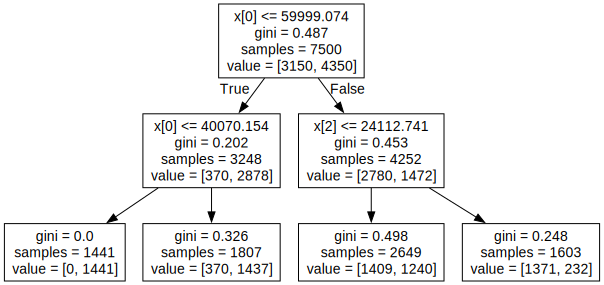

In [17]:
dot_data = export_graphviz(modelo, out_file=None)

grafico = graphviz.Source(dot_data)
grafico

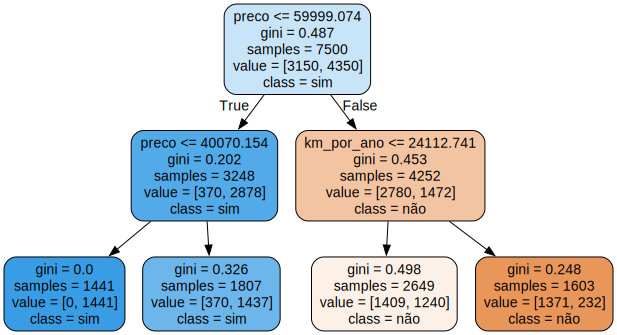

In [18]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled=True, rounded=True,
                           feature_names=features,
                           class_names=["não", "sim"])

grafico = graphviz.Source(dot_data)
grafico

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

seed = 5
np.random.seed(seed)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size=0.25,
                                                        stratify=y)
print (f"Treinamos com {treino_x.shape[0]} elementos de x e {treino_y.shape[0]} elementos de y. \nTestamos com {teste_x.shape[0]} elementos de x e {teste_y.shape[0]} elementos de y.")

# scaler = StandardScaler()
# scaler.fit(raw_treino_x)
# treino_x = scaler.transform(raw_treino_x)
# teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f"\nA taxa de acerto do modelo é de {acuracia*100:.2f}%\n")

Treinamos com 7500 elementos de x e 7500 elementos de y. 
Testamos com 2500 elementos de x e 2500 elementos de y.

A taxa de acerto do modelo é de 79.28%



In [20]:
from sklearn.model_selection import cross_validate

seed = 301
np.random.seed(seed)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=3, return_train_score=False)
media = results["test_score"].mean()
desvio_padrao = results["test_score"].std()

print(f"Accuracy com Cross Validation, 3 = [{(media - 2 * desvio_padrao)*100:.2f}, {(media + 2 * desvio_padrao)*100:.2f}]")

Accuracy com Cross Validation, 3 = [74.99, 76.57]


In [21]:
from sklearn.model_selection import cross_validate

seed = 301
np.random.seed(seed)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=10, return_train_score=False)
media = results["test_score"].mean()
desvio_padrao = results["test_score"].std()

print(f"Accuracy com Cross Validation, 10 = [{(media - 2 * desvio_padrao)*100:.2f}, {(media + 2 * desvio_padrao)*100:.2f}]")

Accuracy com Cross Validation, 10 = [74.24, 77.32]


In [22]:
from sklearn.model_selection import cross_validate

seed = 301
np.random.seed(seed)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=5, return_train_score=False)
media = results["test_score"].mean()
desvio_padrao = results["test_score"].std()

print(f"Accuracy com Cross Validation, 5 = [{(media - 2 * desvio_padrao)*100:.2f}, {(media + 2 * desvio_padrao)*100:.2f}]")

Accuracy com Cross Validation, 5 = [75.21, 76.35]


In [23]:
def imprime_results(results):
    media = results["test_score"].mean()
    desvio_padrao = results["test_score"].std()
    print(f"Accuracy médio: {media * 100:.2f}%")
    print(f"Accuracy intervalo: {(media - 2 * desvio_padrao)*100:.2f}% a {(media + 2 * desvio_padrao)*100:.2f}%")

In [24]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

seed = 301
np.random.seed(seed)

cv = KFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=cv, return_train_score=False)
imprime_results(results)


Accuracy médio: 75.78%
Accuracy intervalo: 74.37% a 77.19%


In [25]:
seed = 301
np.random.seed(seed)

cv = KFold(n_splits=10, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=cv, return_train_score=False)
imprime_results(results)

Accuracy médio: 75.76%
Accuracy intervalo: 73.26% a 78.26%


In [26]:
#Simulando um azar onde os dados vem ordenados e nao de forma aleatoria:

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo", "km_por_ano"]]
y_azar = dados_azar[["vendido"]]
display(x_azar.head(), y_azar.head())

,preco,idade_do_modelo,km_por_ano
4999,74023.29,17,24812.80412
5322,84843.49,18,23095.63834
5319,83100.27,24,36240.72746
5316,87932.13,21,32249.56426
5315,77937.01,20,28414.50704


,vendido
4999,0
5322,0
5319,0
5316,0
5315,0


In [27]:
# Rodando com os dados ordenados:

seed = 301
np.random.seed(seed)

cv = KFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, return_train_score=False)
imprime_results(results)

Accuracy médio: 57.84%
Accuracy intervalo: 34.29% a 81.39%


In [28]:
# Rodando com aleatoriedade para "embaralhar" os dados:

seed = 301
np.random.seed(seed)

cv = KFold(n_splits=10, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, return_train_score=False)
imprime_results(results)

Accuracy médio: 75.78%
Accuracy intervalo: 72.30% a 79.26%


In [29]:
# Rodando com aleatoriedade e estratificação:

from sklearn.model_selection import StratifiedKFold

seed = 301
np.random.seed(seed)

cv = StratifiedKFold(n_splits=10, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, return_train_score=False)
imprime_results(results)

Accuracy médio: 75.78%
Accuracy intervalo: 73.55% a 78.01%


In [30]:
# Rodando só com estratificação e sem aleatoriedade e notando que o resultado já é satisfatorio:

seed = 301
np.random.seed(seed)

cv = StratifiedKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, return_train_score=False)
imprime_results(results)

Accuracy médio: 75.78%
Accuracy intervalo: 73.83% a 77.73%


In [31]:
np.random.seed(seed)
dados["modelo"] = dados["idade_do_modelo"] + np.random.randint(-2, 3, len(dados))
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,23,35085.22134,21
1,40557.96,1,25,12622.05362,27
2,89627.50,0,17,11440.79806,17
3,95276.14,0,8,43167.32682,9
4,117384.68,1,9,12770.11290,8


In [32]:
dados["modelo"].unique()

array([21, 27, 17,  9,  8, 16, 23, 22, 18,  5, 20, 15, 14, 19,  6, 10, 24,
       26, 13, 12, 25, 11,  7,  4], dtype=int64)

In [33]:
from sklearn.model_selection import GroupKFold

seed = 301
np.random.seed(seed)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados["modelo"], return_train_score=False)
imprime_results(results)

Accuracy médio: 75.78%
Accuracy intervalo: 73.67% a 77.90%


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

seed = 301
np.random.seed(seed)

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x_escalado = scaler.transform(treino_x)
teste_x_escalado = scaler.transform(teste_x)

modelo = SVC(gamma="auto")
modelo.fit(treino_x_escalado, treino_y)
previsoes = modelo.predict(teste_x_escalado)

acuracia = accuracy_score(teste_y, previsoes)
print(f"\nA taxa de acerto do modelo é de {acuracia*100:.2f}%\n")

c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



A taxa de acerto do modelo é de 77.48%



In [35]:
from sklearn.model_selection import GroupKFold

seed = 301
np.random.seed(seed)

cv = GroupKFold(n_splits=10)
modelo = SVC()
results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados["modelo"], return_train_score=False)
imprime_results(results)

c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-

Accuracy médio: 77.28%
Accuracy intervalo: 74.39% a 80.18%


In [36]:
scaler = StandardScaler()
scaler.fit(x_azar)
x_azar_escalado = scaler.transform(x_azar)

In [37]:
seed = 301
np.random.seed(seed)

cv = GroupKFold(n_splits=10)
modelo = SVC()
results = cross_validate(modelo, x_azar_escalado, y_azar, cv=cv, groups=dados["modelo"], return_train_score=False)
imprime_results(results)

c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-

Accuracy médio: 76.70%
Accuracy intervalo: 74.30% a 79.10%


In [41]:
from sklearn.pipeline import Pipeline

seed = 301
np.random.seed(seed)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([("transformacao", scaler), ("estimador" ,modelo)])

cv = GroupKFold(n_splits=10)
results = cross_validate(pipeline, x_azar, y_azar, cv=cv, groups=dados["modelo"], return_train_score=False)
imprime_results(results)

c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-

Accuracy médio: 76.68%
Accuracy intervalo: 74.28% a 79.08%
